# AUTHOR: ANIKET PATIL 
## Task 3: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. 

# 1. Import Libraries 

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# 2. Getting Data 

In [164]:
df = pd.read_csv('./bank.csv', sep=";")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


# 2. Exploratory Data Analysis

In [166]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [168]:
df['y'].value_counts()
df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [169]:
df.describe()
df['y'].unique()

array(['no', 'yes'], dtype=object)

# 3. Machine Learning Part
After cleaning the dataset we train the 'decision tree' classifier model with scikit-learn. Since our output variable 'y' is categorical variable, for which we will use a classification algorithm. 

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

##  3.1 Data Pre-Processing

In [173]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

## 3.2 Train Split the data

In [175]:
X = df.drop('y', axis=1)
y = df['y']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## 3.3 Decision Tree

In [178]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## 3.4 Model Prediction

In [181]:
predictions = dtree.predict(X_test)

In [182]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1200
           1       0.42      0.39      0.41       157

    accuracy                           0.87      1357
   macro avg       0.67      0.66      0.67      1357
weighted avg       0.86      0.87      0.87      1357



In [183]:
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix

array([[1116,   84],
       [  95,   62]])

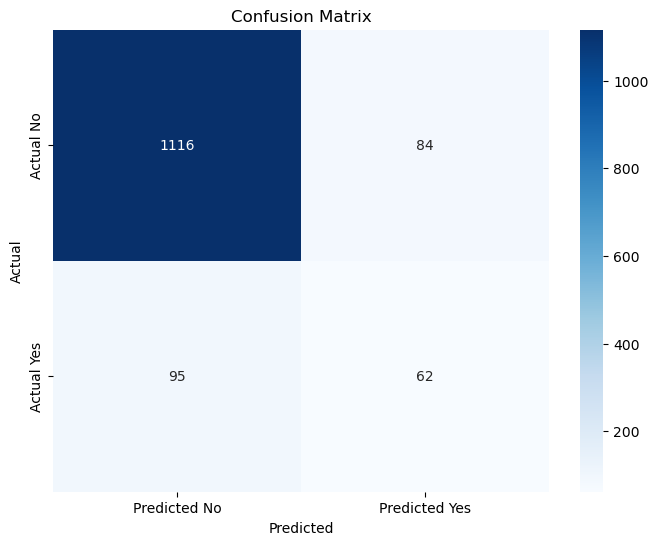

In [184]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No', 'Predicted Yes'], 
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()